# loss, perp をプロット

### メモ
- latent = 200 と 100 はほぼ差なし  
    したがって表現力は latent = 100 で十分
- n_unit = n_embed = 300 で十分かどうかは要確認  
- 学習に時間がかかりすぎるため、batchsize x2, k /2 として epoch の進みを2倍にした(2/14)

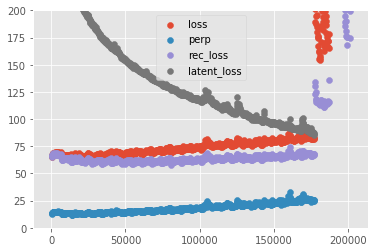

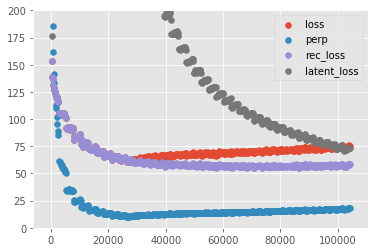

In [89]:
%matplotlib inline

#coding: utf-8
import matplotlib.pyplot as plt
import numpy as np
import os
import json
plt.style.use('ggplot') 

# グラフ
def plot_loss_perp(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = [d["iteration"] for d in log]
    epoch = [d["epoch"] for d in log]
    loss = [d["main/loss"] for d in log]
    perp = [d["main/perp"] for d in log]
    
    plt.scatter(iter, loss, label="loss")
    plt.scatter(iter, perp, label="perp")
    
    try:
        rec_loss = [d["main/rec"] for d in log]
        latent_loss = [d["main/lat"] for d in log]
        plt.scatter(iter, rec_loss, label="rec_loss")
        plt.scatter(iter, latent_loss, label="latent_loss")
    except:
        pass
    
    plt.legend()
    plt.ylim([0, 200])
    plt.show()

plot_loss_perp()
#plot_loss_perp(result_dir = 'result_ae_0121/')
#plot_loss_perp(result_dir = 'result_ae_0123/')
plot_loss_perp(result_dir = 'result_0212_latent200/')


# bleu, rouge-l (p, r, f)をプロット

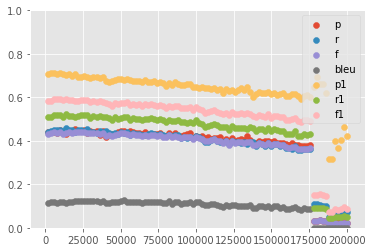

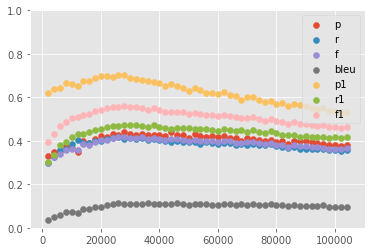

In [90]:
def plot_bleu(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    # bleu があるリストだけ取り出す
    log_b = []
    for d in log:
        if 'bleu' in d.keys():
            log_b.append(d)
            
    iter = [d["iteration"] for d in log_b]
    p = [d["p"] for d in log_b]
    r = [d["r"] for d in log_b]
    f = [d["f"] for d in log_b]
    bleu = [d["bleu"] for d in log_b]
    
    plt.scatter(iter, p, label="p")
    plt.scatter(iter, r, label="r")
    plt.scatter(iter, f, label="f")
    plt.scatter(iter, bleu, label="bleu")
    
    try:
        p1 = [d["p1"] for d in log_b]
        r1 = [d["r1"] for d in log_b]
        f1 = [d["f1"] for d in log_b]
        plt.scatter(iter, p1, label="p1")
        plt.scatter(iter, r1, label="r1")
        plt.scatter(iter, f1, label="f1")
    except:
        pass

    plt.legend()
    plt.ylim([0.0, 1.0])
    plt.show()
    
plot_bleu()
plot_bleu(result_dir = 'result_0212_latent200/')


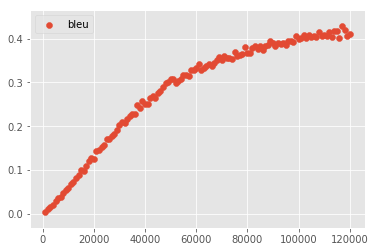

In [28]:
def plot_bleu_old(result_dir = 'result/'):
    f = open(os.path.join(result_dir, 'log'), 'r')
    log = json.load(f)
    
    iter = []
    bleu = []
    for d in log:
        if "validation/main/bleu" in d:
            iter.append(d["iteration"])
            bleu.append(d["validation/main/bleu"])
    
    plt.scatter(iter, bleu, label="bleu")
    plt.legend()
    plt.show()
    
plot_bleu_old(result_dir = 'result_ae_0120')